## **3.2.1 Business Understanding**

## **3.2.2 Data Understanding**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 200)

In [3]:
path = "/content/drive/MyDrive/MATKUL_ELEKTRONIK/customer_shopping_data.csv"
df_raw = pd.read_csv(path)

print("Shape:", df_raw.shape)
df_raw.head()


Shape: (99457, 10)


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [4]:
#Cek Tipe Data & Ringkasan Awal
df_raw.info()
df_raw.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
count,99457,99457,99457,99457.000000,99457,99457.000000,99457.000000,99457,99457,99457
unique,99457,99457,2,NaN,8,NaN,NaN,3,797,10
top,I232867,C273973,Female,NaN,Clothing,NaN,NaN,Cash,24/11/2021,Mall of Istanbul
freq,1,1,59482,NaN,34487,NaN,NaN,44447,159,19943
mean,NaN,NaN,NaN,43.427089,NaN,3.003429,689.256321,NaN,NaN,NaN
std,NaN,NaN,NaN,14.990054,NaN,1.413025,941.184567,NaN,NaN,NaN
min,NaN,NaN,NaN,18.000000,NaN,1.000000,5.230000,NaN,NaN,NaN
25%,NaN,NaN,NaN,30.000000,NaN,2.000000,45.450000,NaN,NaN,NaN
50%,NaN,NaN,NaN,43.000000,NaN,3.000000,203.300000,NaN,NaN,NaN
75%,NaN,NaN,NaN,56.000000,NaN,4.000000,1200.320000,NaN,NaN,NaN


In [5]:
#Cek duplicate & missing
print("Duplicate rows:", df_raw.duplicated().sum())
print("\nMissing values per column:\n", df_raw.isnull().sum())


Duplicate rows: 0

Missing values per column:
 invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


In [6]:
#Drop invoice_no & customer_id
df = df_raw.copy()
df = df.drop(columns=["invoice_no", "customer_id"], errors="ignore")

df.head()


,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [7]:
# parsing invoice_date (string → datetime)
df["invoice_date_time"] = pd.to_datetime(
    df["invoice_date"],
    dayfirst=True,
    errors="coerce"
)

# ekstraksi fitur waktu
df["invoice_date_day"] = df["invoice_date_time"].dt.day
df["invoice_date_month"] = df["invoice_date_time"].dt.month
df["invoice_date_year"] = df["invoice_date_time"].dt.year

# drop kolom string tanggal (sudah tidak dipakai)
df = df.drop(columns=["invoice_date"])

df.head()


,gender,age,category,quantity,price,payment_method,shopping_mall,invoice_date_time,invoice_date_day,invoice_date_month,invoice_date_year
0,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,2022-08-05,5,8,2022
1,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,2021-12-12,12,12,2021
2,Male,20,Clothing,1,300.08,Cash,Metrocity,2021-11-09,9,11,2021
3,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,2021-05-16,16,5,2021
4,Female,53,Books,4,60.60,Cash,Kanyon,2021-10-24,24,10,2021


In [9]:
print("Tanggal min:", df["invoice_date_time"].min())
print("Tanggal max:", df["invoice_date_time"].max())
print("Jumlah null invoice_date_time:", df["invoice_date_time"].isnull().sum())


Tanggal min: 2021-01-01 00:00:00
Tanggal max: 2023-03-08 00:00:00
Jumlah null invoice_date_time: 0


**Feature Engineering**

In [10]:
df["total_spend"] = df["price"] * df["quantity"]

df[["price", "quantity", "total_spend"]].head()


,price,quantity,total_spend
0,1500.40,5,7502.00
1,1800.51,3,5401.53
2,300.08,1,300.08
3,3000.85,5,15004.25
4,60.60,4,242.40


In [14]:
# Klasifikasi umur sementara (bukan preprocessing final clustering)
def map_age(a):
    if a <= 20:
        return 1
    elif 21 <= a <= 30:
        return 2
    elif 31 <= a <= 40:
        return 3
    elif 41 <= a <= 50:
        return 4
    elif 51 <= a <= 60:
        return 5
    elif 61 <= a <= 70:
        return 6
    else:
        return 0  # Other / tidak terdefinisi

df["age_class"] = df["age"].apply(map_age).astype(int)

df[["age", "age_class"]].head()


,age,age_class
0,28,2
1,21,2
2,20,1
3,66,6
4,53,5


In [15]:
ages_sorted = list(range(18, 70))
ages_sorted[:5], ages_sorted[-5:]

([18, 19, 20, 21, 22], [65, 66, 67, 68, 69])

In [16]:
#Ringkasan KPI awal
print("Jumlah transaksi:", len(df))
print("Total spend:", df["total_spend"].sum())
print("Rata-rata spend:", df["total_spend"].mean())
print("Median spend:", df["total_spend"].median())


Jumlah transaksi: 99457
Total spend: 251505794.25000003
Rata-rata spend: 2528.78926822647
Median spend: 600.17


**Fungsi INSIGHT (parameter vs transaksi & spend)**

In [17]:
def insight_by(df, group_col, top_n=15, sort_by="total_spend_sum"):
    insight = (
        df.groupby(group_col, dropna=False)
          .agg(
              transaksi_count=("total_spend", "size"),
              total_spend_sum=("total_spend", "sum"),
              total_spend_avg=("total_spend", "mean"),
              price_avg=("price", "mean"),
              quantity_avg=("quantity", "mean"),
          )
          .reset_index()
    )

    insight = insight.sort_values(sort_by, ascending=False)
    return insight.head(top_n)

In [18]:
# Tes insight
display(insight_by(df, "gender"))
display(insight_by(df, "payment_method"))
display(insight_by(df, "shopping_mall", top_n=10))
display(insight_by(df, "category", top_n=10))
display(insight_by(df, "age", top_n=52))

# Simulasi dropdown age: pilih salah satu usia
selected_age = 28
df_age = df[df["age"] == selected_age]

print(f"\n=== INSIGHT untuk age = {selected_age} (subset data) ===")
display(insight_by(df_age, "category", top_n=10))
display(insight_by(df_age, "shopping_mall", top_n=10))
display(insight_by(df_age, "payment_method", top_n=10))

#Tambahan: Insight berdasarkan AGE_CLASS
display(insight_by(df, "age_class", top_n=6))

# Simulasi dropdown age_class: pilih salah satu kelas umur
selected_age_class = 2
df_agec = df[df["age_class"] == selected_age_class]

print(f"\n INSIGHT untuk age_class = {selected_age_class} (subset data)")
display(insight_by(df_agec, "category", top_n=10))
display(insight_by(df_agec, "shopping_mall", top_n=10))
display(insight_by(df_agec, "payment_method", top_n=10))


,gender,transaksi_count,total_spend_sum,total_spend_avg,price_avg,quantity_avg
0,Female,59482,1.502071e+08,2525.253623,688.137615,3.003581
1,Male,39975,1.012987e+08,2534.050237,690.920933,3.003202


,payment_method,transaksi_count,total_spend_sum,total_spend_avg,price_avg,quantity_avg
0,Cash,44447,1.128322e+08,2538.579500,690.823475,3.000652
1,Credit Card,34931,8.807712e+07,2521.460129,688.542467,3.007214
2,Debit Card,20079,5.059643e+07,2519.867895,687.029135,3.002988


,shopping_mall,transaksi_count,total_spend_sum,total_spend_avg,price_avg,quantity_avg
5,Mall of Istanbul,19943,50872481.68,2550.894132,694.566395,3.014291
4,Kanyon,19823,50554231.10,2550.281547,691.658944,2.999395
6,Metrocity,15011,37302787.33,2485.030133,682.831262,2.990740
7,Metropol AVM,10161,25379913.19,2497.777108,682.806120,3.004626
3,Istinye Park,9781,24618827.68,2517.005181,686.747525,3.012473
9,Zorlu Center,5075,12901053.82,2542.079570,691.556457,3.001773
0,Cevahir AVM,4991,12645138.20,2533.588099,687.972719,2.995191
8,Viaport Outlet,4914,12521339.72,2548.095181,694.753655,2.994709
1,Emaar Square Mall,4811,12406100.29,2578.694718,704.720081,3.014134
2,Forum Istanbul,4947,12303921.24,2487.148017,674.363012,3.002224


,category,transaksi_count,total_spend_sum,total_spend_avg,price_avg,quantity_avg
1,Clothing,34487,1.139968e+08,3305.500364,901.084021,3.002813
4,Shoes,10034,6.655345e+07,6632.793649,1807.388568,3.011461
6,Technology,4996,5.786235e+07,11581.735388,3156.935548,3.006605
2,Cosmetics,15097,6.792863e+06,449.947864,122.448626,3.011525
7,Toys,10087,3.980426e+06,394.609521,107.733185,3.005948
3,Food & Beverage,14776,8.495351e+05,57.494251,15.671948,2.996548
0,Books,4981,8.345529e+05,167.547260,45.568621,3.007830
5,Souvenir,4999,6.358247e+05,127.190368,34.894345,2.974795


,age,transaksi_count,total_spend_sum,total_spend_avg,price_avg,quantity_avg
19,37,2057,5578539.57,2711.978401,723.987725,3.022363
46,64,2002,5272475.10,2633.603946,712.802987,2.992507
33,51,1993,5238724.74,2628.562338,710.439358,3.017561
4,22,2051,5208841.41,2539.659391,694.415529,2.997562
9,27,1950,5171859.06,2652.235415,708.155077,3.061026
21,39,1947,5135672.77,2637.736400,709.014612,3.016949
30,48,1955,5131747.86,2624.934967,701.189893,3.027110
26,44,1904,5131686.80,2695.213655,722.530221,3.034139
6,24,1977,5082409.90,2570.768791,700.899868,3.013151
25,43,2000,5050323.72,2525.161860,686.502120,2.964000



=== INSIGHT untuk age = 28 (subset data) ===


,category,transaksi_count,total_spend_sum,total_spend_avg,price_avg,quantity_avg
1,Clothing,694,2352927.28,3390.385130,916.238501,3.053314
4,Shoes,186,1208142.21,6495.388226,1790.829839,2.983871
6,Technology,104,1129800.00,10863.461538,2988.461538,2.846154
2,Cosmetics,287,120475.58,419.775540,118.296516,2.909408
7,Toys,227,84367.36,371.662379,103.257093,2.881057
0,Books,106,18149.70,171.223585,46.021698,3.037736
3,Food & Beverage,269,14942.11,55.546877,15.417807,2.947955
5,Souvenir,80,11331.18,141.639750,37.829250,3.225000


,shopping_mall,transaksi_count,total_spend_sum,total_spend_avg,price_avg,quantity_avg
4,Kanyon,370,922818.60,2494.104324,695.672108,2.951351
5,Mall of Istanbul,375,886258.31,2363.355493,652.452560,2.928000
6,Metrocity,314,743519.73,2367.897229,666.894299,2.939490
7,Metropol AVM,207,599827.02,2897.715072,754.808792,3.130435
3,Istinye Park,204,476058.15,2333.618382,647.066225,2.970588
9,Zorlu Center,95,308293.05,3245.190000,842.411263,3.084211
0,Cevahir AVM,94,277137.72,2948.273617,797.450851,3.095745
8,Viaport Outlet,110,274120.65,2492.005909,674.962091,2.872727
2,Forum Istanbul,100,266394.03,2663.940300,709.448500,3.050000
1,Emaar Square Mall,84,185708.16,2210.811429,586.977381,3.095238


,payment_method,transaksi_count,total_spend_sum,total_spend_avg,price_avg,quantity_avg
0,Cash,871,2147105.09,2465.103433,683.657623,2.964409
1,Credit Card,669,1783952.30,2666.595366,719.481256,2.986547
2,Debit Card,413,1009078.03,2443.288208,659.582591,3.031477


,age_class,transaksi_count,total_spend_sum,total_spend_avg,price_avg,quantity_avg
1,2,19400,49388519.37,2545.799968,693.089194,3.008814
3,4,19066,48779846.58,2558.473019,696.476902,2.997797
2,3,19266,48370413.32,2510.661960,686.957188,3.002699
4,5,18932,47788662.58,2524.226842,686.482420,3.010617
5,6,17169,43519469.66,2534.770206,689.427523,3.001747
0,1,5624,13658882.74,2428.677585,668.247408,2.987376



 INSIGHT untuk age_class = 2 (subset data)


,category,transaksi_count,total_spend_sum,total_spend_avg,price_avg,quantity_avg
1,Clothing,6752,22358660.72,3311.413021,901.439964,3.003999
4,Shoes,1954,13064500.56,6686.028946,1816.481771,3.026612
6,Technology,991,11410350.00,11513.975782,3141.523713,2.991927
2,Cosmetics,2894,1297460.60,448.327782,122.260995,3.006911
7,Toys,2047,801454.08,391.526175,107.222355,2.991695
0,Books,964,165771.30,171.961929,46.110062,3.043568
3,Food & Beverage,2824,163814.06,58.007812,15.756671,3.012748
5,Souvenir,974,126508.05,129.885062,35.418819,3.019507


,shopping_mall,transaksi_count,total_spend_sum,total_spend_avg,price_avg,quantity_avg
4,Kanyon,3816,9735176.48,2551.146876,686.161069,3.042977
5,Mall of Istanbul,3932,9642899.72,2452.416002,677.840249,2.974313
6,Metrocity,2918,7432729.59,2547.199997,700.326583,2.970185
7,Metropol AVM,2015,5282763.27,2621.718744,704.609752,3.046650
3,Istinye Park,1913,4689680.00,2451.479352,670.277752,3.008887
8,Viaport Outlet,961,2597368.21,2702.776493,721.094662,2.992716
9,Zorlu Center,961,2567077.01,2671.255994,723.152914,3.030177
0,Cevahir AVM,1016,2512604.54,2473.035965,680.188858,3.017717
1,Emaar Square Mall,906,2488223.99,2746.384095,732.426678,3.034216
2,Forum Istanbul,962,2439996.56,2536.378960,700.744844,3.013514


,payment_method,transaksi_count,total_spend_sum,total_spend_avg,price_avg,quantity_avg
0,Cash,8675,22003107.65,2536.381285,690.471784,3.011527
1,Credit Card,6787,17343299.38,2555.370470,697.999694,2.996611
2,Debit Card,3938,10042112.34,2550.053921,690.392006,3.023870


**Fungsi bar chart**

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_two_bars(
    insight_df,
    x_col,
    title_prefix="",
    palette="Set2",
    figsize=(10,4),
    order=None,
    rotate_x=False,
    label_position="center",
    label_rotation=0,
    label_fontsize=9
):

    def _plot_one(y_col, title):
        plt.figure(figsize=figsize)
        ax = sns.barplot(
            data=insight_df,
            x=x_col,
            y=y_col,
            palette=palette,
            order=order
        )

        # label bar
        for p in ax.patches:
            h = p.get_height()
            if h == 0:
                continue

            if label_position == "center":
                y = h / 2
                va = "center"
                color = "white"
            else:
                y = h
                va = "bottom"
                color = "black"

            ax.annotate(
                f"{h:,.0f}" if y_col != "transaksi_count" else f"{int(h):,}",
                (p.get_x() + p.get_width() / 2., y),
                ha="center",
                va=va,
                fontsize=label_fontsize,
                color=color,
                rotation=label_rotation
            )

        plt.title(title)
        if rotate_x:
            plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

    # 1) Total Spend
    _plot_one(
        "total_spend_sum",
        f"{title_prefix} - Total Spend"
    )

    # 2) Jumlah Transaksi
    _plot_one(
        "transaksi_count",
        f"{title_prefix} - Jumlah Transaksi"
    )


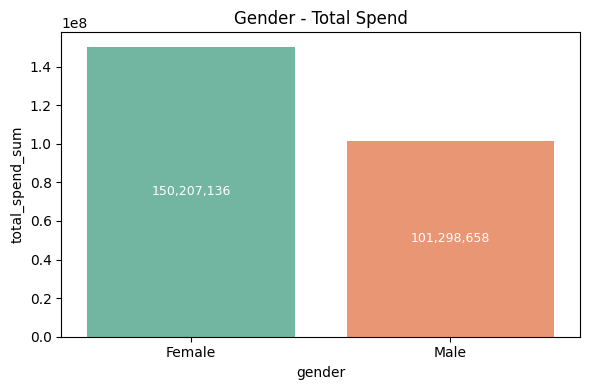

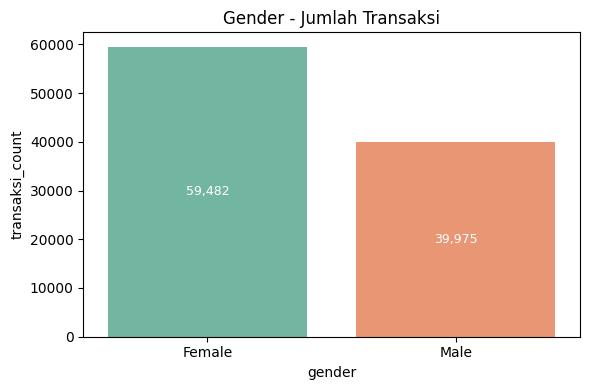

In [50]:
gender_insight = insight_by(df, "gender")

plot_two_bars(
    gender_insight,
    x_col="gender",
    title_prefix="Gender",
    palette="Set2",
    figsize=(6,4)
)


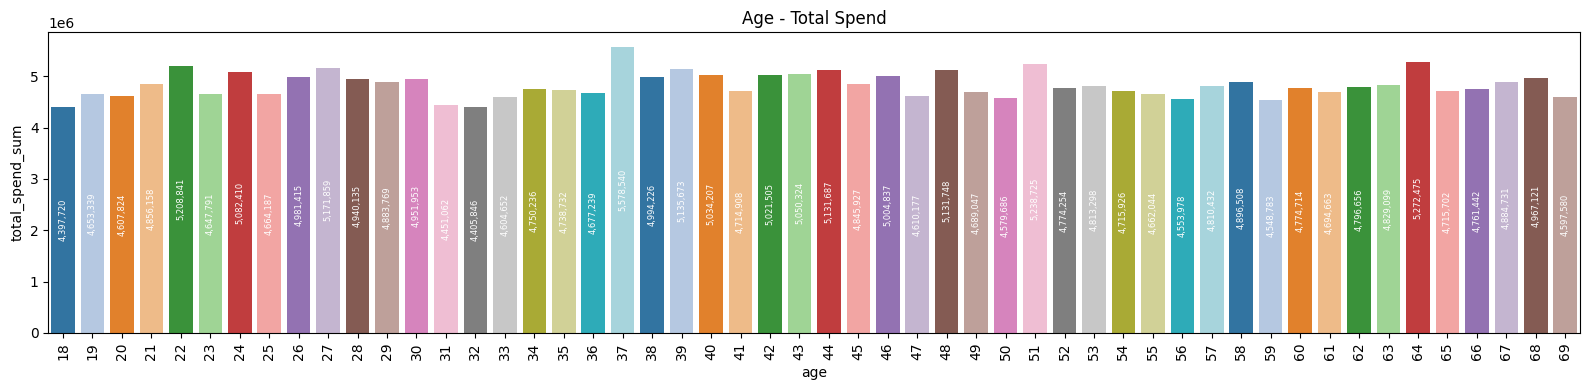

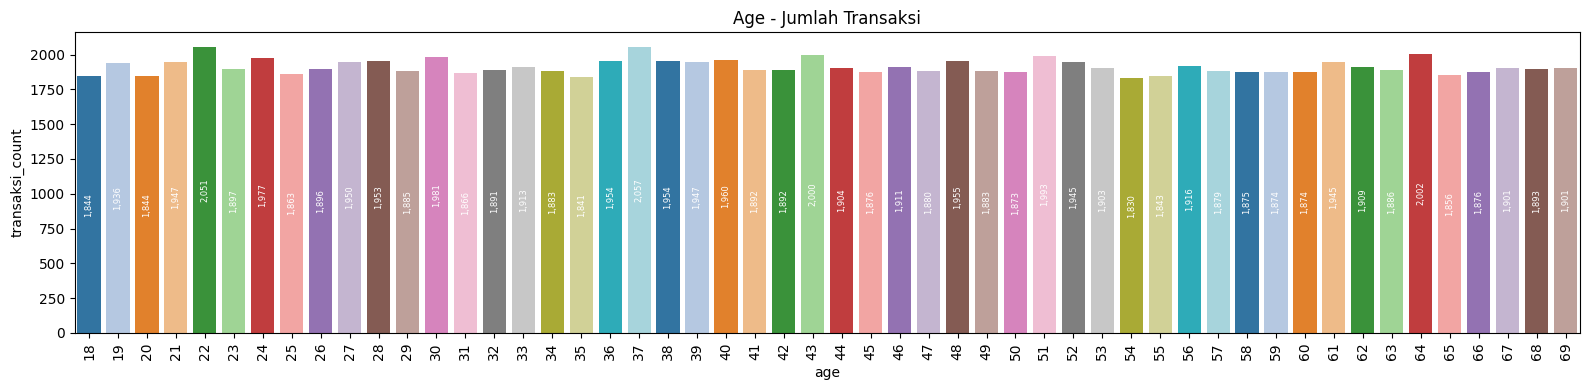

In [52]:
age_insight = insight_by(df, "age", top_n=52).sort_values("age")

plot_two_bars(
    age_insight,
    x_col="age",
    title_prefix="Age",
    palette="tab20",
    figsize=(16,4),
    order=sorted(df["age"].unique()),
    rotate_x=True,
    label_position="center",
    label_rotation=90,
    label_fontsize=6
)


In [54]:
ageclass_desc = {
    1: "≤ 20 tahun",
    2: "21 – 30 tahun",
    3: "31 – 40 tahun",
    4: "41 – 50 tahun",
    5: "51 – 60 tahun",
    6: "61 – 70 tahun"
}

def plot_two_bars_ageclass(
    insight_df,
    x_col,
    title_prefix="Age Class",
    palette="Set2",
    figsize=(7,4),
    ageclass_desc=None,
    label_fontsize=9
):
    """
    Plot 2 bar chart (Total Spend & Jumlah Transaksi)
    + keterangan Age Class di samping
    """

    def _plot_one(y_col, title):
        plt.figure(figsize=figsize)
        ax = sns.barplot(
            data=insight_df,
            x=x_col,
            y=y_col,
            palette=palette
        )

        # label di atas bar
        for p in ax.patches:
            h = p.get_height()
            if h == 0:
                continue
            ax.annotate(
                f"{h:,.0f}" if y_col != "transaksi_count" else f"{int(h):,}",
                (p.get_x() + p.get_width() / 2., h),
                ha="center",
                va="bottom",
                fontsize=label_fontsize
            )

        # --- KETERANGAN AGE CLASS ---
        if ageclass_desc is not None:
            text = "\n".join([f"{k}: {v}" for k, v in ageclass_desc.items()])
            ax.text(
                1.02, 0.5,
                text,
                transform=ax.transAxes,
                fontsize=9,
                va="center",
                bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="gray")
            )

        plt.title(title)
        plt.tight_layout()
        plt.show()

    # 1) Total Spend
    _plot_one(
        "total_spend_sum",
        f"{title_prefix} – Total Spend"
    )

    # 2) Jumlah Transaksi
    _plot_one(
        "transaksi_count",
        f"{title_prefix} – Jumlah Transaksi"
    )


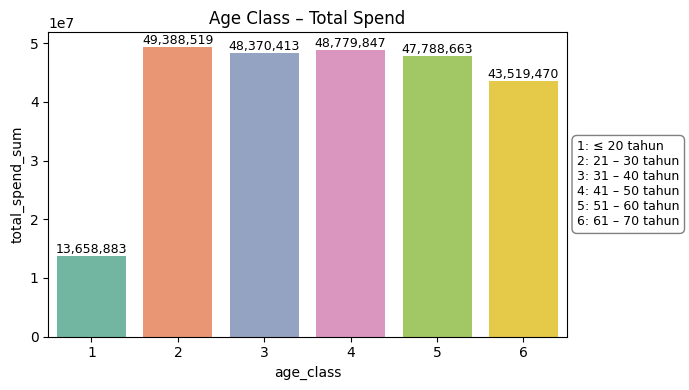

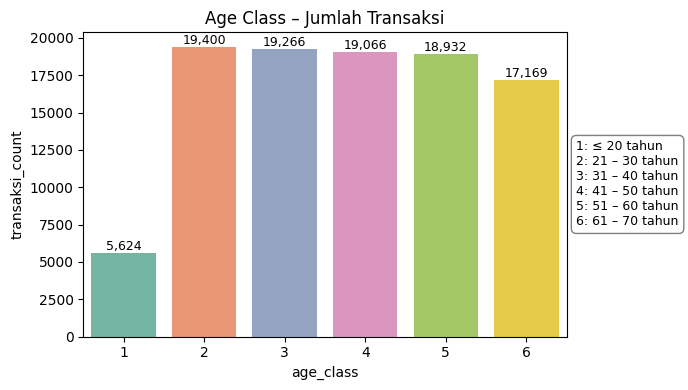

In [55]:
ageclass_insight = insight_by(df, "age_class", top_n=6).sort_values("age_class")

plot_two_bars_ageclass(
    ageclass_insight,
    x_col="age_class",
    title_prefix="Age Class",
    palette="Set2",
    figsize=(7,4),
    ageclass_desc=ageclass_desc
)


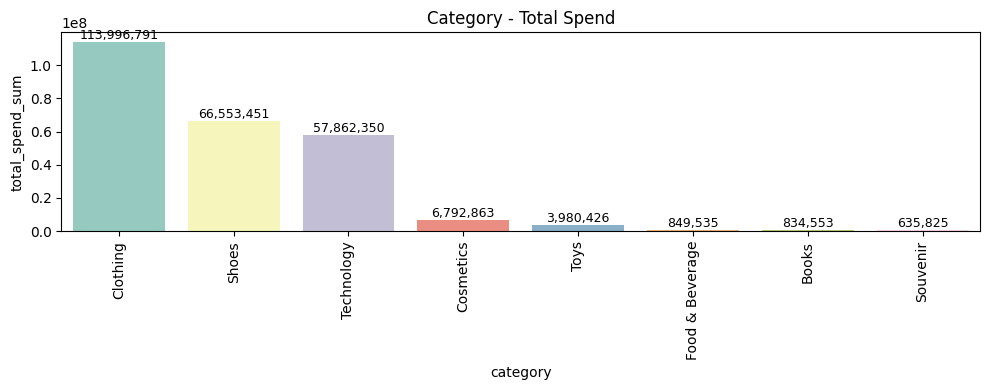

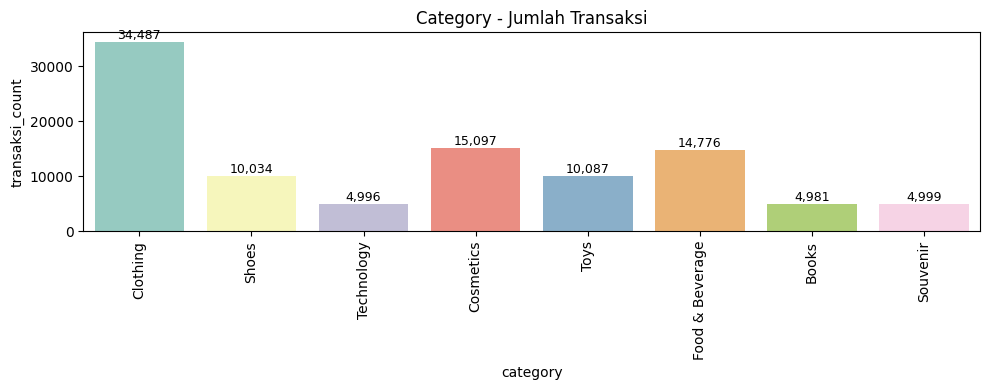

In [58]:
category_insight = insight_by(df, "category", top_n=10)

plot_two_bars(
    category_insight,
    x_col="category",
    title_prefix="Category",
    palette="Set3",
    figsize=(10,4),
    rotate_x=True,
    label_position="top",
    label_rotation=0,
    label_fontsize=9
)


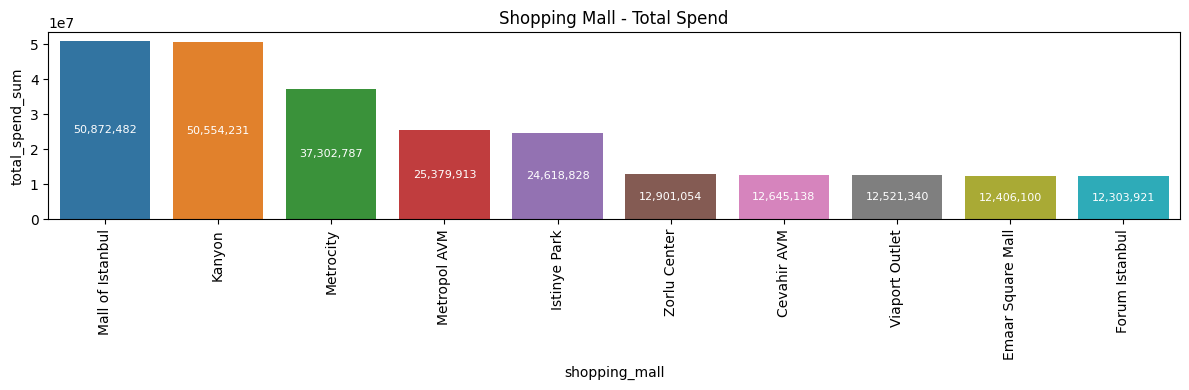

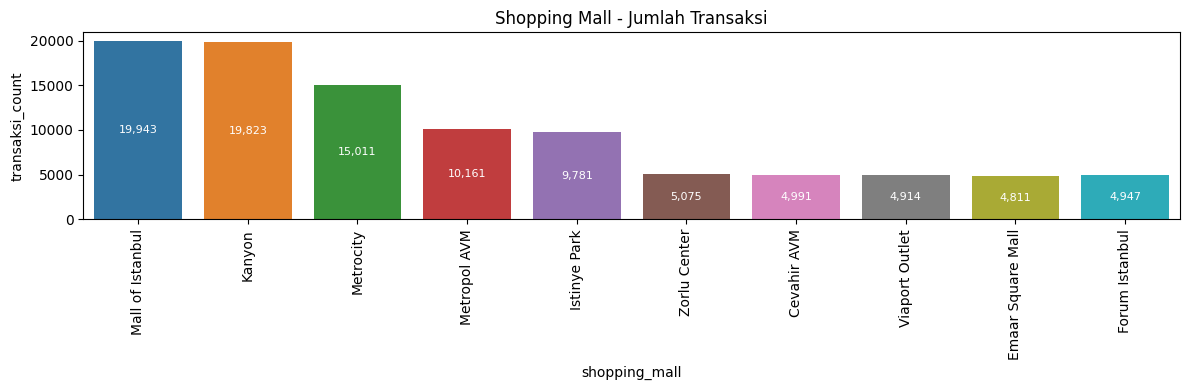

In [60]:
mall_insight = insight_by(df, "shopping_mall", top_n=10)

plot_two_bars(
    mall_insight,
    x_col="shopping_mall",
    title_prefix="Shopping Mall",
    palette="tab10",
    figsize=(12,4),
    rotate_x=True,
    label_fontsize=8
)

In [61]:
# Path tujuan simpan
save_path = "/content/drive/MyDrive/MATKUL_ELEKTRONIK/customer_shopping_data_insight_ready.csv"

# Simpan ke CSV
df.to_csv(save_path, index=False)

print("File berhasil disimpan di:")
print(save_path)

# Cek file tersimpan
import os
print("Berhasil/Tidak", os.path.exists(save_path))


File berhasil disimpan di:
/content/drive/MyDrive/MATKUL_ELEKTRONIK/customer_shopping_data_insight_ready.csv
Berhasil/Tidak True
